In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


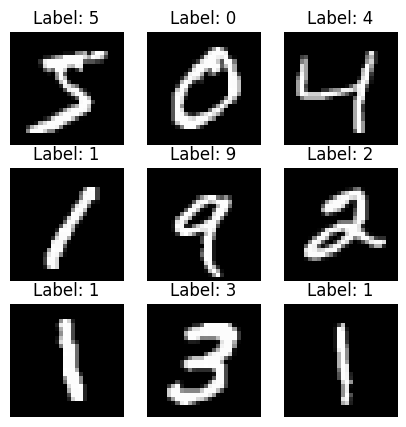

In [12]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()


In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9157 - loss: 0.2826 - val_accuracy: 0.9805 - val_loss: 0.0610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.9846 - loss: 0.0510 - val_accuracy: 0.9849 - val_loss: 0.0443
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9916 - loss: 0.0290 - val_accuracy: 0.9830 - val_loss: 0.0529
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9857 - val_loss: 0.0480
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9861 - val_loss: 0.0492
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9847 - val_loss: 0.0535
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.9854 - val_loss: 0.0575
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9984 -

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9846 - loss: 0.0761
Test Accuracy: 98.69%


In [ ]:
model.save('digit_model.h5')


Phase 2

In [ ]:
pip install tensorflow pillow numpy
